In [43]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib, matplotlib.pyplot as plt

In [2]:
connection = sqlite3.connect("/data/lisa/data/pharmacodb/pharmacodb-1.1.1.sqlite")

In [3]:
pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';",connection)

,name
0,ar_internal_metadata
1,cell_tissues
2,sqlite_sequence
3,cellosaurus
4,cells
5,dataset_cells
6,datasets
7,dose_responses
8,drug_annots
9,drug_targets


In [4]:
pd.read_sql_query("SELECT * from profiles;",connection).head()

,experiment_id,HS,Einf,EC50,AAC,IC50,DSS1,DSS2,DSS3
0,1,0.746334,0.201721,0.816574,0.101705,1.117170,0.055120,0.012585,0.004371
1,2,0.666924,0.000000,0.339757,0.223977,0.339757,0.166143,0.036077,0.020525
2,3,2.898750,0.362617,0.236141,0.121595,0.429685,0.100812,0.024264,0.006361
3,4,1.080270,0.000000,0.715953,0.109245,0.715953,0.074055,0.016081,0.004911
4,5,0.560433,0.173457,0.402657,0.191285,0.732813,0.125938,0.028527,0.016580


In [12]:
pd.read_sql_query("SELECT * from profiles;",connection).shape

(650894, 9)

In [19]:
pd.read_sql_query("SELECT * from experiments;",connection).head()

,experiment_id,cell_id,drug_id,dataset_id,tissue_id
0,1,2,21,1,9
1,2,12,21,1,28
2,3,16,21,1,9
3,4,20,21,1,38
4,5,24,21,1,38


In [37]:
query = """
SELECT * from experiments 
INNER JOIN datasets ON experiments.dataset_id=datasets.dataset_id
INNER JOIN cells ON experiments.cell_id = cells.cell_id
INNER JOIN drugs ON experiments.drug_id = drugs.drug_id
INNER JOIN tissues ON experiments.tissue_id = tissues.tissue_id
LIMIT 10
"""

res = pd.read_sql_query(query,connection).head()
res = res.set_index("experiment_id")
#drop id cols
todrop = [col for col in res.columns if "_id" in col]
res = res.drop(todrop, axis=1)

In [38]:
res

,dataset_name,cell_name,drug_name,tissue_name
experiment_id,,,,
1,CCLE,1321N1,AEW541,central_nervous_system
2,CCLE,22RV1,AEW541,prostate
3,CCLE,42-MG-BA,AEW541,central_nervous_system
4,CCLE,5637,AEW541,urinary_tract
5,CCLE,639-V,AEW541,urinary_tract


In [35]:
pd.read_sql_query("SELECT * from profiles;",connection).head()

,experiment_id,HS,Einf,EC50,AAC,IC50,DSS1,DSS2,DSS3
0,1,0.746334,0.201721,0.816574,0.101705,1.117170,0.055120,0.012585,0.004371
1,2,0.666924,0.000000,0.339757,0.223977,0.339757,0.166143,0.036077,0.020525
2,3,2.898750,0.362617,0.236141,0.121595,0.429685,0.100812,0.024264,0.006361
3,4,1.080270,0.000000,0.715953,0.109245,0.715953,0.074055,0.016081,0.004911
4,5,0.560433,0.173457,0.402657,0.191285,0.732813,0.125938,0.028527,0.016580


In [36]:
pd.read_sql_query("SELECT * from profiles;",connection).shape

(650894, 9)

In [39]:
pd.read_sql_query("SELECT * from cellosaurus;",connection).head()

,id,identifier,accession,as,sy,dr,rx,ww,cc,st,di,ox,hi,oi,sx,ca,created_at,updated_at
0,1,#15310-LN,CVCL_E548,None,15310-LN; TER461,dbMHC; 48439 | ECACC; 94050311 | IHW; IHW9326 ...,None,http://bioinformatics.hsanmartino.it/ecbr/cl32...,Part of: 12th International Histocompatibility...,None,None,NCBI_TaxID=9606; ! Homo sapiens,None,None,Female,Transformed cell line,2017-02-21 18:11:26,2017-02-21 18:11:26
1,2,#490,CVCL_B375,None,Mab 7; Mab7,CLO; CLO_0001018 | ATCC; HB-12029,Patent=US5616470;,None,Monoclonal antibody target: Cronartium ribicol...,None,None,NCBI_TaxID=10090; ! Mus musculus,CVCL_4032 ! P3X63Ag8.653,None,None,Hybridoma,2017-02-21 18:11:26,2017-02-21 18:11:26
2,3,#822,CVCL_X345,None,Mab 13; Mab13,ATCC; HB-12030,Patent=US5616470;,None,Monoclonal antibody target: Cronartium ribicol...,None,None,NCBI_TaxID=10090; ! Mus musculus,CVCL_4032 ! P3X63Ag8.653,None,None,Hybridoma,2017-02-21 18:11:26,2017-02-21 18:11:26
3,4,#W7079,CVCL_E549,None,#W7079 REM; REMUS; W7079,dbMHC; 48440 | ECACC; 94022552 | IHW; IHW9223 ...,None,http://bioinformatics.hsanmartino.it/ecbr/cl22...,Part of: 12th International Histocompatibility...,None,None,NCBI_TaxID=9606; ! Homo sapiens,None,None,Sex undetermined,Transformed cell line,2017-02-21 18:11:26,2017-02-21 18:11:26
4,5,(BF1) 8A3.31,CVCL_G217,None,None,CLO; CLO_0001019 | ATCC; HB-9283,Patent=US4845026;,None,None,None,None,NCBI_TaxID=10090; ! Mus musculus,None,None,None,Hybridoma,2017-02-21 18:11:26,2017-02-21 18:11:26


In [41]:
pd.read_sql_query("SELECT * from dose_responses;",connection).head()

,id,experiment_id,dose,response
0,1,1,0.0025,108.67
1,2,1,0.0080,111.00
2,3,1,0.0250,102.16
3,4,1,0.0800,100.27
4,5,1,0.2500,90.00


In [42]:
pd.read_sql_query("SELECT * from dose_responses;",connection).shape

(8314894, 4)

In [44]:
resp = pd.read_sql_query("SELECT * from dose_responses WHERE experiment_id = 1;",connection)

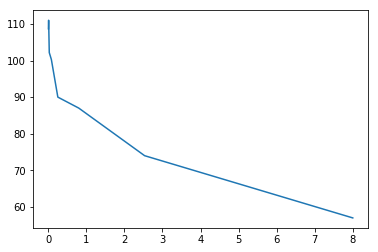

In [48]:
%matplotlib inline
plt.plot(resp["dose"], resp["response"]);